In [1]:
from veldis.veldis import Veldis

import matplotlib.pyplot as plt
import numpy as np

### Load the galaxy spectrum. For this we use the 'specim' package. It supports several type of file formats like text file, fits file or multi-extension fits file. Then the 'informat' would be 'text', 'fits' and 'mwa' respectively. You can also choose to provide wavelength, flux and variance data using appropitale parameters of the class 'Veldis'. You can also trim the spectrum while loading.

In [2]:
spec = Veldis('RXJ1131_spec.fits', informat='mwa', trimsec=[0, -2])


Reading spectrum from RXJ1131_spec.fits
Expected file format: mwa
 Spectrum Start:  5020.78
 Spectrum End:     8217.58
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



### plot and smooth the spectrum and also check red shift by mark the lines at that red shift. 'abs' for absorption lines and 'em' for emission lines.


Line        lambda_rest  lambda_obs
----------  -----------  -----------
CN bandhd     3883.00       5028.48
CaII K        3933.67       5094.10
CaII H        3968.47       5139.17
H-delta       4101.00       5310.80
G-band        4305.00       5574.97
H-gamma       4340.00       5620.30
Fe4383        4383.00       5675.98
Ca4455        4455.00       5769.22
Fe4531        4531.00       5867.64
H-beta        4861.00       6294.99
Mg I (b)      5176.00       6702.92
Na I (D)      5889.95       7627.49
Na I (D)      5895.92       7635.22



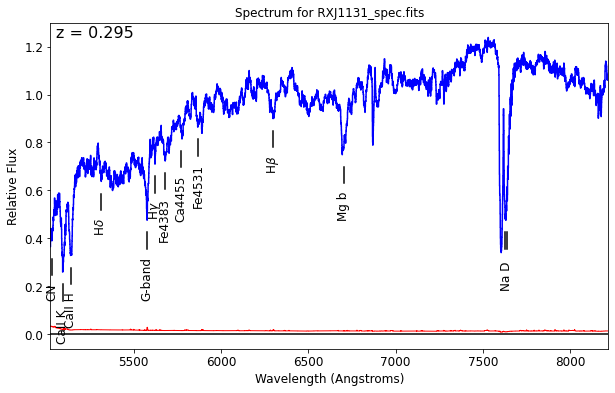

In [3]:
fg = plt.figure(figsize=(10,6))
spec.smooth(3, fig=fg)
spec.mark_lines('abs', z=0.295, usesmooth=True)

###  Check whether your template spectra will cover the entire galaxy spectrum. You need to provide a template spectrum and the red shift of the galaxy. For example, here I have used a stellar template from Indo-US library.

In [4]:
spec.check_temp_coverage(intemp='100006.txt', z=0.295)


Covered range for redshift 0.295000 : 4487.175000 - 12262.355000


### Now start measuring velocity dispersion. The following function will calculate some mandatory  parametrs required by ppxf like velocity scale and would also log rebin the flux and noise data if they are in linear scale. If you want to restframe the wavelength and sigma of the instrumental LSF, set the parameter 'high_z' to True. The 'logscale' parameter is to let the code know whether log rebinning is necessary or not. Set the 'logscale' parameter to 'True' if the data is already in logscale. The 'veldis_start' is to set the starting assumption of the velocity dispersion.

Velocity scale = 36.963545 km/s


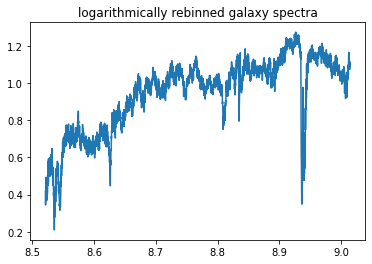

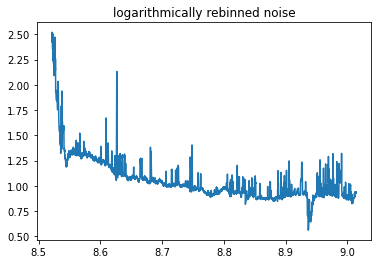

In [5]:
spec.cal_parm(z=0.295, high_z=False, logscale=False, noise_scale=1.0, veldis_start=300)

### The following function will work on the template spectra. It'll logarithmically rebin the template spectra and convolve them with a Gaussian function so that they would have the same instrumental LSF as the galaxy spectra (like the templates have been taken using the same instrument). You need to provide the path to the library. I have used Indo-US library. You can choose how many templates you want to use using the parameter 'temp_num'. There are several other options to choose the the quantity of template spectra. You need to provide sigma of the instrumental LSF here using the parameter 'sig_ins'. You can also provide the FWHM of the template spectra using the parameter 'fwhm_temp'.

In [6]:
temp_spec = spec.gen_rebinned_temp(lib_path='../../TEXT/*', temp_num=400, sig_ins=1.32)


As no 'fwhm_temp' value is provided, FWHM for the Indo-US template library will be used as default value
vsyst = -111185.019848 

sigma_diff : 2.972569


### Choose the wavelength ranges which you want to exclude from fit and take the natural logarithm of those numbers. If the parameter 'high_z' is set to True, then restframe the wavelength ranges.

In [7]:
### If 'high_z' =True

# z=0.295
# mask_region1 = np.log(np.array([(6785, 6971), (7570, 7850)])/(1+z))

mask_region1 = np.log(np.array([(6785, 6971), (7570, 7850)]))
            
mask_region2 = np.log(np.array([(5018, 5401), (6752, 6971), (7453, 8225)]))
mask_region1

array([[8.82246957, 8.84951397],
       [8.93194835, 8.96826881]])

### Now we can calculate velocity dispersion. We need to provide the logarithimically rebinned template data, the degree range or a single degree of the additive polynomial, region to mask. You can also choose to provide other parameters supported by ppxf. If you have no region to mask just don't use the parameter 'mask_reg'.


degree : 4
 Best Fit:       Vel     sigma
 comp.  0:     77567       329
chi2/DOF: 0.0008006; DOF: 3482; degree = 4; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%): 13/400

degree : 5
 Best Fit:       Vel     sigma
 comp.  0:     77569       316
chi2/DOF: 0.0007687; DOF: 3482; degree = 5; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%): 16/400

degree : 6
 Best Fit:       Vel     sigma
 comp.  0:     77567       305
chi2/DOF: 0.0007341; DOF: 3482; degree = 6; mdegree = 0
method = capfit; Jac calls: 2; Func calls: 8; Status: 3
linear_method = lsq_box; Nonzero Templates (>0.1%): 16/400

degree : 7
 Best Fit:       Vel     sigma
 comp.  0:     77568       309
chi2/DOF: 0.0007230; DOF: 3482; degree = 7; mdegree = 0
method = capfit; Jac calls: 3; Func calls: 11; Status: 4
linear_method = lsq_box; Nonzero Templates (>0.1%): 16/400

degree : 8
 Best 

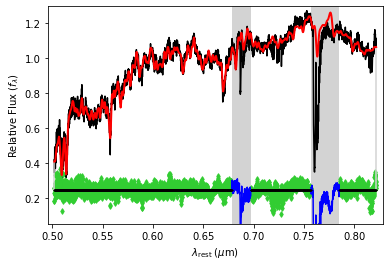

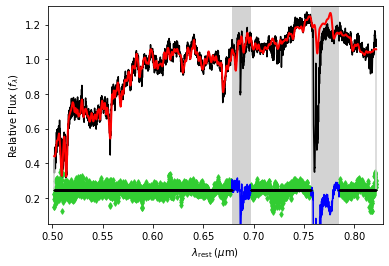

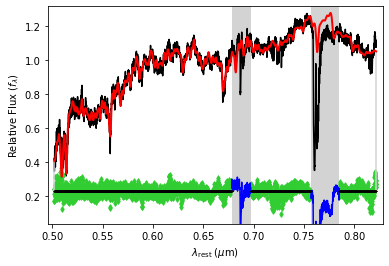

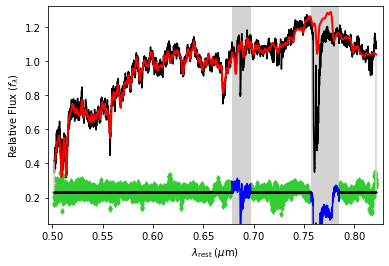

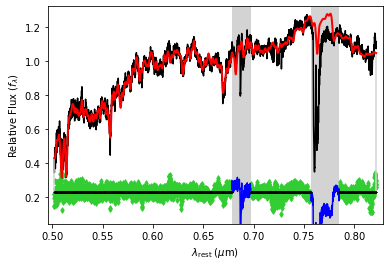

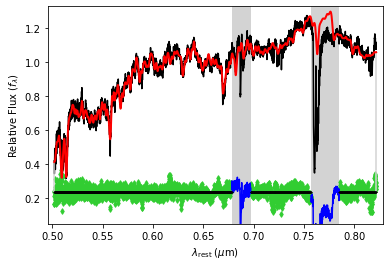

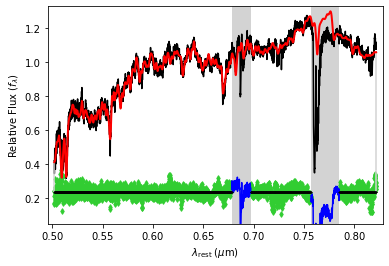

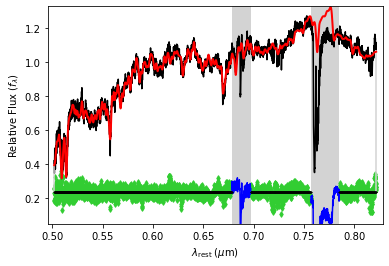

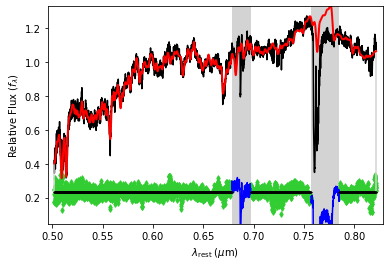

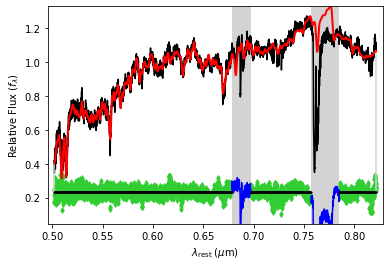

<Figure size 432x288 with 0 Axes>

In [8]:
spec.cal_veldis(temp_spec=temp_spec, degree=[4, 14], mask_reg=mask_region1, show_weight=True, moments=2)

### There  are several plotting functions in the package. Just to plot the velocity dispersions...

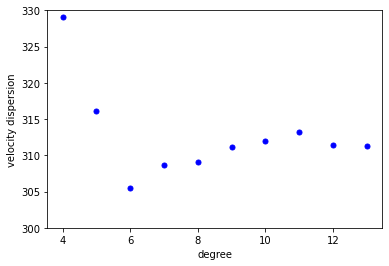

In [9]:
spec.plot_veldis(ylim=[300, 330])

### To check the fit closely...

order : 4


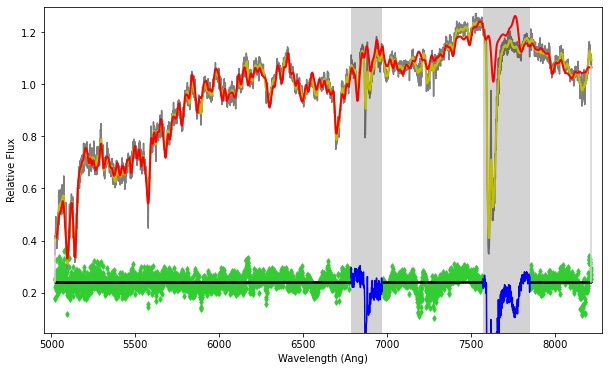

order : 6


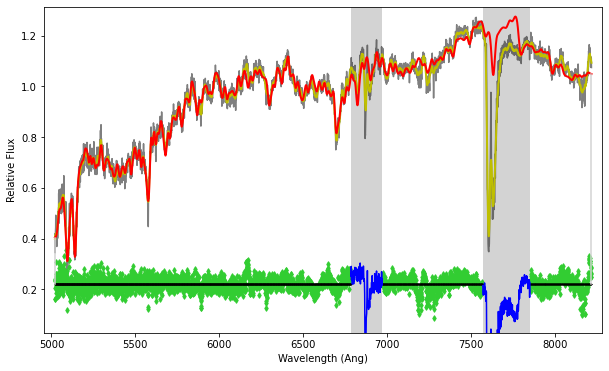

In [10]:
ord_list = np.array([4, 6])

for od in ord_list:
    fg = plt.figure(figsize=(10,6))
    spec.plot_fit(order=od, boxsize=15, fig=fg)
    print('order : %d' %od)
    plt.show()